In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data
import datetime as dt

from cycler import cycler
from random import randint
import matplotlib as mpl

from get_metacritic_data import read_csv_data, filter_df

In [46]:
plt.style.use('ggplot')
mpl.rc('lines', linewidth=3)
mpl.rc('legend', fontsize=18)  # using a size in points

params = {'xtick.labelsize': 19,
          'ytick.labelsize': 19,
          'axes.labelsize': 'x-large'}
plt.rcParams.update(params)

In [47]:
def plot_data(ticker, start, end, thresh, figsize):

    # User pandas_reader.data.DataReader to load the desired data. As simple as that.
    panel_data = data.DataReader(ticker, 'yahoo', start, end)

    # get games above threshold
    good_games = df[(df.metacritic >= thresh)][['releasedate', 'name']]
    good_games.reset_index(inplace=True)

    # define colors
    color = []
    for i in range(len(good_games)):
        color.append('#%06X' % randint(0, 0xFFFFFF))


    fig = plt.figure(figsize=figsize)
    plt.style.use('ggplot')
    ax = plt.gca()


    sns.lineplot(data=panel_data.reset_index(), x='Date', y='Close', label='Stock Price', linewidth=2, color='black', ls='-')
    for i in good_games.iterrows():
        plt.axvline(i[1][1], label=i[1][2], lw=4, color=color[i[0]], ls='--')
    plt.legend(bbox_to_anchor=(1.05, 1))


    plt.ylabel('Price', size=20)
    plt.xlabel('Date', labelpad=0, size=20)

    ax.tick_params(direction='out', length=6, width=2, which='major')
    ax.tick_params(direction='out', length=4, width=2, which='minor')
    plt.show()

In [48]:
# df = read_csv_data("metacritic_game_data.csv")
publisher = ['Electronic Arts', 'EA Games', 'EA Sports']
platform = None  # ["pc", "nintendo-64", "playstation", "dreamcast", "playstation-2", "xbox", "game-boy-advance", "gamecube", "ds", "psp", "xbox-360", "playstation-3", "wii", "3ds", "playstation-vita", "wii-u", "playstation-4", "xbox-one", "switch", "stadia", playstation-5", "xbox-series-x"]
df = filter_df(publisher=publisher, platform=platform)

c:\users\fabian knebel\pycharmprojects\gamestonk\venv\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


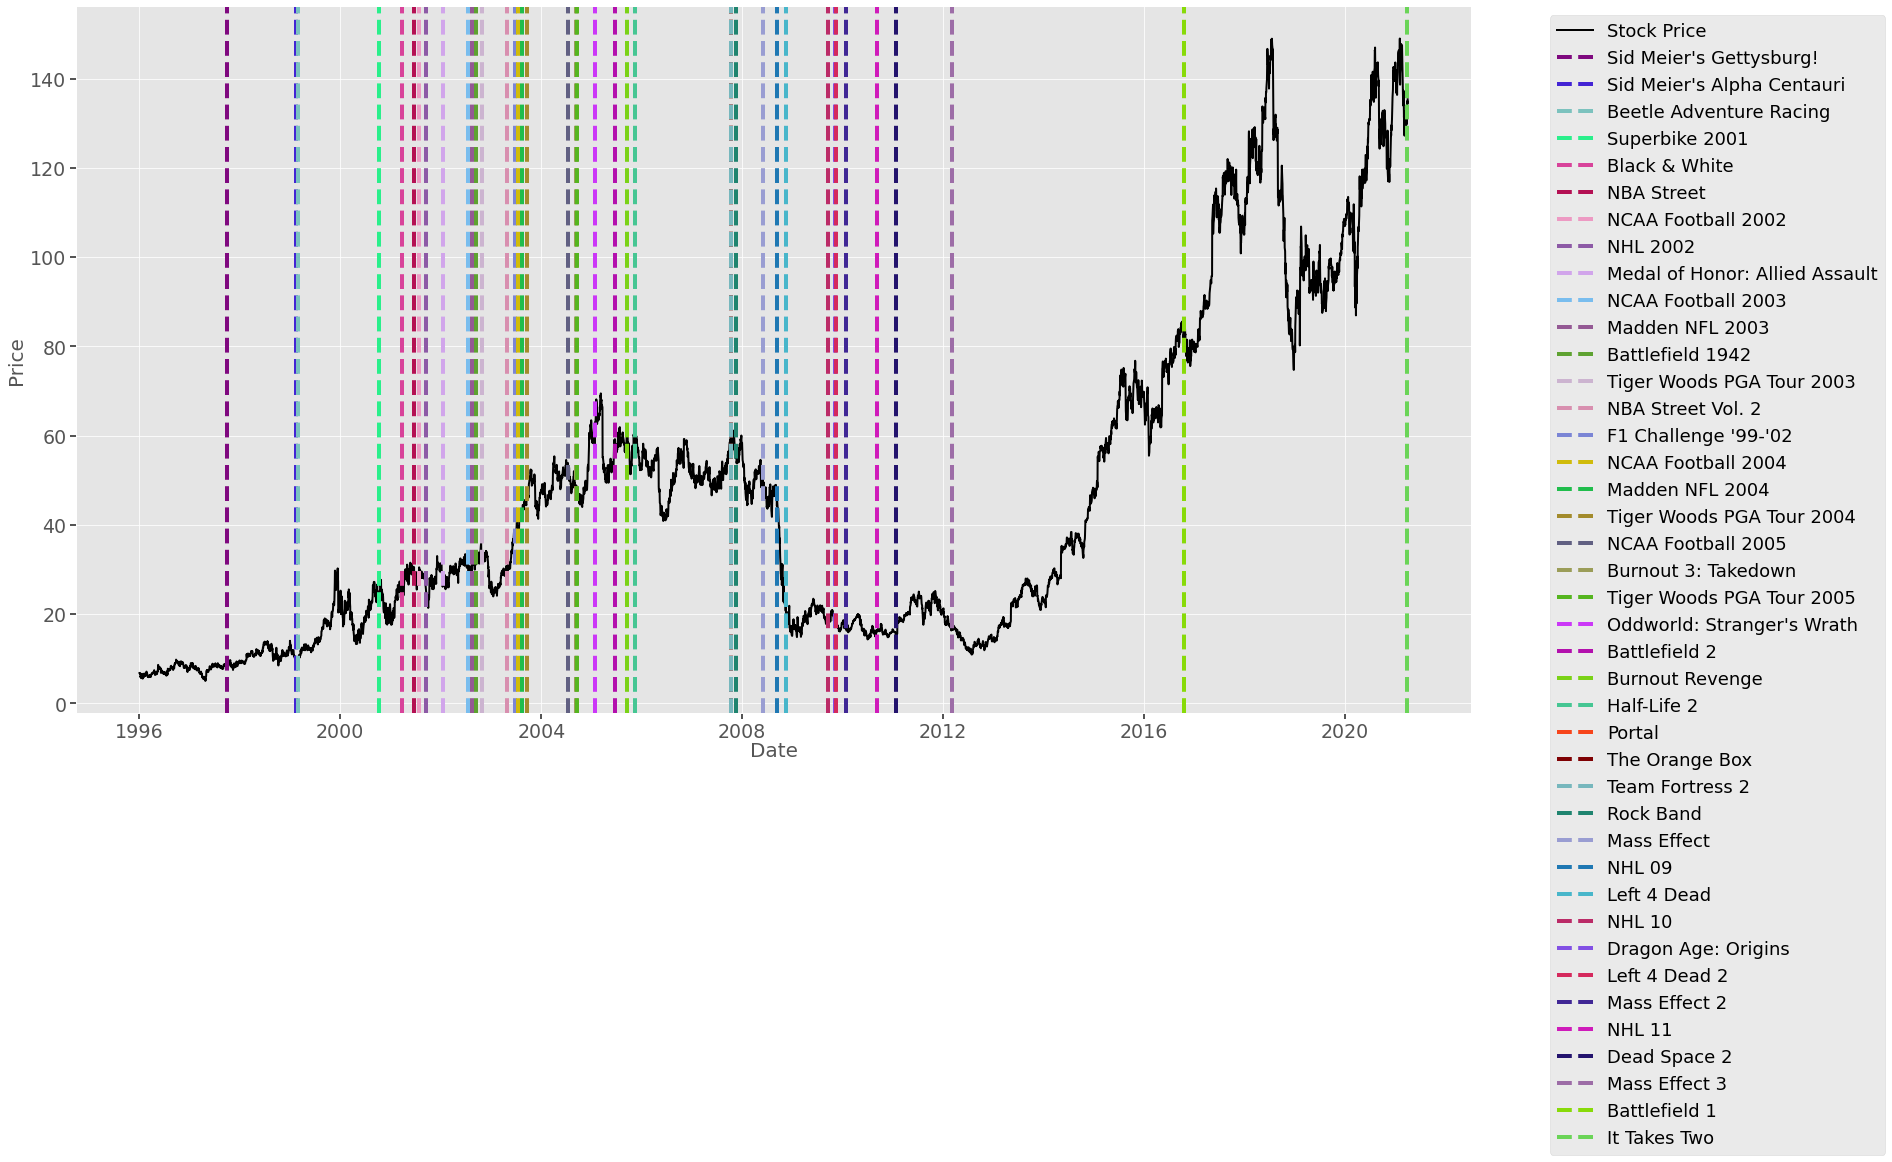

In [49]:
params = {'start':'1996-01-01',
         'end':'2021-03-31',
          'ticker':'EA',
         'thresh':88,
         'figsize':(25,13)}

plot_data(**params)